In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기
#### 액셀 파일 불러오고 난 후, 이터의 첫 번째 열이 연도 정보이므로 'Year'로 이름을 변경하고, 월별 데이터 행에 연도 값이 비어있는 경우 ffill() 메소드를 사용해 이전 연도 값으로 채워 넣어 데이터를 정제

In [81]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/구자욱 기록.xlsx")
df = df.rename(columns={'Unnamed: 0': 'Year'})
df['Year'] = df['Year'].ffill()
df

,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2025.0,3월,36,35,31,7,8,2,0,2,...,0,1,0.258,0.333,0.516,0.849,114,0.98,6.63,0.235
1,2025.0,4월,101,99,85,20,22,5,0,5,...,1,1,0.259,0.360,0.494,0.854,429,1.05,0.86,-0.129
2,2025.0,5월,102,102,89,14,21,7,0,2,...,0,2,0.236,0.314,0.382,0.696,434,1.10,-1.10,-0.104
3,2025.0,6월,94,94,85,14,28,6,0,3,...,0,1,0.329,0.383,0.506,0.889,383,1.06,6.23,1.022
4,2025.0,7월,83,82,71,17,33,10,0,1,...,0,2,0.465,0.518,0.648,1.166,311,1.08,6.74,0.836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2015.0,5월,90,90,84,15,26,7,1,3,...,0,0,0.310,0.356,0.524,0.880,313,0.91,1.97,0.204
73,2015.0,6월,57,57,50,14,23,6,1,3,...,0,0,0.460,0.526,0.800,1.326,225,0.81,6.54,0.424
74,2015.0,7월,100,100,85,23,36,9,0,0,...,0,2,0.424,0.490,0.529,1.019,408,0.96,13.20,0.720
75,2015.0,8월,106,106,94,24,31,4,2,2,...,0,0,0.330,0.406,0.479,0.885,433,0.83,6.09,0.012


## Group data by month

### Subtask:
'월' 컬럼을 기준으로 데이터를 그룹화합니다.


In [82]:
grouped_by_month = df.groupby('월')

## Create separate dataframes

### Subtask:
각 월별 그룹에 대해 별도의 데이터프레임을 생성합니다.


**Reasoning**:
Iterate through the grouped data and create separate dataframes for each month.



In [83]:
for month, month_df in grouped_by_month:
    # Create a dynamic variable name for each month's dataframe
    var_name = f'player_{month}'
    globals()[var_name] = month_df.reset_index(drop=True)

## Display dataframes

### Subtask:
생성된 각 월별 데이터프레임을 출력하여 확인합니다.


**Reasoning**:
Display each monthly dataframe to verify their creation and content.



In [84]:
display(player_3월)
display(player_4월)
display(player_5월)
display(player_6월)
display(player_7월)
display(player_8월)
display(player_9월)
display(player_10월)

,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2025.0,3월,36,35,31,7,8,2,0,2,...,0,1,0.258,0.333,0.516,0.849,114,0.98,6.63,0.235
1,2024.0,3월,37,37,30,4,6,0,0,1,...,0,2,0.200,0.297,0.300,0.597,145,1.34,-2.13,-0.041
2,2019.0,3월,38,38,35,6,11,2,1,1,...,0,0,0.314,0.368,0.514,0.882,136,0.87,0.79,-0.164
3,2018.0,3월,32,32,31,5,6,1,0,0,...,0,0,0.194,0.219,0.226,0.445,120,0.95,-3.06,-0.299
4,2017.0,3월,4,4,4,1,2,1,0,1,...,0,0,0.500,0.500,1.500,2.000,6,1.27,0.05,0.081
5,2015.0,3월,13,13,12,1,3,2,0,0,...,0,0,0.250,0.308,0.417,0.725,70,0.62,-1.35,-0.026


,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2025.0,4월,101,99,85,20,22,5,0,5,...,1,1,0.259,0.360,0.494,0.854,429,1.05,0.86,-0.129
1,2024.0,4월,103,102,92,15,35,9,0,4,...,0,0,0.380,0.447,0.609,1.056,373,0.82,12.42,1.529
2,2023.0,4월,110,110,93,16,31,8,0,2,...,0,3,0.333,0.409,0.484,0.893,458,1.09,5.94,0.561
3,2022.0,4월,76,76,70,9,16,3,1,0,...,0,0,0.229,0.289,0.300,0.589,254,1.08,-6.77,-0.389
4,2021.0,4월,106,106,89,19,30,7,1,4,...,0,2,0.337,0.425,0.573,0.998,493,1.00,11.68,1.245
5,2019.0,4월,96,96,86,13,24,6,2,2,...,0,1,0.279,0.344,0.465,0.809,362,1.18,6.87,0.570
6,2018.0,4월,17,17,16,1,4,0,0,0,...,0,0,0.250,0.294,0.250,0.544,65,1.28,-2.45,-0.155
7,2017.0,4월,113,113,100,14,25,7,2,3,...,0,0,0.250,0.336,0.450,0.786,448,1.11,-4.13,0.066
8,2016.0,4월,100,99,87,19,32,6,2,2,...,1,1,0.368,0.434,0.552,0.986,382,0.88,15.72,1.520
9,2015.0,4월,81,81,69,15,18,4,0,3,...,0,1,0.261,0.358,0.449,0.807,332,0.80,-0.46,0.168


,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2025.0,5월,102,102,89,14,21,7,0,2,...,0,2,0.236,0.314,0.382,0.696,434,1.10,-1.10,-0.104
1,2024.0,5월,101,101,91,15,22,3,1,4,...,0,0,0.242,0.317,0.429,0.746,422,0.93,-1.25,-0.091
2,2023.0,5월,92,90,79,10,19,7,1,1,...,1,0,0.241,0.341,0.392,0.733,397,1.13,4.20,-0.020
3,2022.0,5월,53,52,51,5,17,2,0,1,...,0,0,0.333,0.358,0.431,0.789,225,1.23,0.26,-0.128
4,2021.0,5월,104,104,92,18,23,3,3,1,...,0,3,0.250,0.308,0.380,0.688,393,0.93,5.87,0.591
5,2020.0,5월,43,43,36,6,13,4,0,1,...,0,1,0.361,0.442,0.556,0.998,167,0.89,6.64,0.344
6,2019.0,5월,106,105,95,13,27,5,1,3,...,0,1,0.284,0.349,0.453,0.802,373,0.94,4.18,0.336
7,2018.0,5월,77,77,67,17,28,5,2,1,...,0,1,0.418,0.481,0.597,1.078,336,0.82,7.60,1.299
8,2017.0,5월,107,107,89,20,30,6,3,6,...,0,3,0.337,0.421,0.674,1.095,407,1.01,13.50,1.024
9,2016.0,5월,100,100,81,24,31,4,3,3,...,0,1,0.383,0.490,0.617,1.107,423,0.93,9.42,0.912


,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2025.0,6월,94,94,85,14,28,6,0,3,...,0,1,0.329,0.383,0.506,0.889,383,1.06,6.23,1.022
1,2024.0,6월,107,107,99,15,34,12,0,7,...,0,0,0.343,0.393,0.677,1.070,396,1.01,7.36,1.617
2,2023.0,6월,12,12,11,2,4,3,0,0,...,0,0,0.364,0.417,0.636,1.053,51,0.93,1.22,0.237
3,2022.0,6월,50,49,47,8,14,4,0,1,...,1,0,0.298,0.327,0.447,0.774,164,1.01,3.05,0.371
4,2021.0,6월,95,95,88,16,26,3,1,5,...,0,2,0.295,0.326,0.523,0.849,366,0.83,5.32,0.477
5,2020.0,6월,82,82,75,11,22,6,0,4,...,0,1,0.293,0.341,0.533,0.874,327,1.04,6.76,0.831
6,2019.0,6월,109,109,97,15,28,5,0,5,...,0,2,0.289,0.349,0.495,0.844,404,0.83,4.42,0.585
7,2018.0,6월,113,112,102,23,32,5,1,2,...,0,0,0.314,0.381,0.441,0.822,455,0.86,6.22,1.185
8,2017.0,6월,118,118,102,26,34,9,2,4,...,0,1,0.333,0.415,0.578,0.993,508,0.94,14.80,0.823
9,2015.0,6월,57,57,50,14,23,6,1,3,...,0,0,0.460,0.526,0.800,1.326,225,0.81,6.54,0.424


,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2025.0,7월,83,82,71,17,33,10,0,1,...,0,2,0.465,0.518,0.648,1.166,311,1.08,6.74,0.836
1,2024.0,7월,49,49,39,10,10,2,0,4,...,0,2,0.256,0.367,0.615,0.982,180,0.87,0.50,0.191
2,2023.0,7월,67,66,61,5,23,4,0,1,...,1,0,0.377,0.424,0.492,0.916,265,1.12,6.99,0.794
3,2022.0,7월,45,45,40,10,12,4,1,0,...,0,0,0.300,0.378,0.450,0.828,192,1.21,1.93,-0.005
4,2021.0,7월,31,30,27,5,4,0,0,1,...,1,0,0.148,0.233,0.259,0.492,114,1.29,-4.11,-0.374
5,2020.0,7월,85,85,75,15,29,4,0,2,...,0,0,0.387,0.459,0.520,0.979,350,1.17,7.81,1.175
6,2019.0,7월,28,28,27,2,6,1,1,0,...,0,0,0.222,0.250,0.333,0.583,105,1.18,-2.42,-0.385
7,2018.0,7월,99,99,91,16,30,7,1,4,...,0,0,0.330,0.384,0.560,0.944,384,1.08,6.09,0.734
8,2017.0,7월,99,99,85,15,22,3,0,5,...,0,2,0.259,0.343,0.471,0.814,406,0.91,7.11,0.404
9,2016.0,7월,63,62,56,12,21,1,3,3,...,1,0,0.375,0.435,0.661,1.096,225,1.29,10.06,1.830


,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2025.0,8월,123,122,102,21,35,9,1,3,...,0,1,0.343,0.447,0.539,0.986,523,0.98,20.68,1.595
1,2024.0,8월,103,101,84,15,33,10,0,4,...,2,1,0.393,0.485,0.655,1.140,410,1.05,16.47,1.117
2,2023.0,8월,94,93,85,14,35,10,0,4,...,0,0,0.412,0.468,0.671,1.139,378,1.16,17.92,1.969
3,2022.0,8월,94,94,85,13,22,4,1,0,...,0,0,0.259,0.330,0.329,0.659,354,1.03,1.60,-0.108
4,2021.0,8월,78,78,68,17,22,6,1,2,...,0,1,0.324,0.397,0.529,0.926,295,0.94,3.57,0.366
5,2020.0,8월,102,102,87,7,21,1,0,1,...,0,1,0.241,0.343,0.287,0.630,435,0.99,1.05,0.195
6,2019.0,8월,61,61,53,7,13,6,1,1,...,0,1,0.245,0.328,0.453,0.781,223,0.78,2.56,0.083
7,2018.0,8월,62,62,55,16,23,2,1,6,...,0,1,0.418,0.468,0.818,1.286,217,0.87,9.91,0.691
8,2017.0,8월,112,112,101,16,36,8,2,0,...,0,0,0.356,0.420,0.475,0.895,493,1.05,10.03,0.307
9,2016.0,8월,109,109,97,24,32,4,3,2,...,0,3,0.330,0.376,0.495,0.871,410,0.90,4.35,0.633


,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2025.0,9월,56,56,48,9,14,1,1,3,...,0,0,0.292,0.393,0.542,0.935,227,0.95,4.84,0.577
1,2024.0,9월,68,66,58,18,29,3,0,9,...,0,1,0.500,0.559,1.017,1.576,234,0.87,21.09,1.654
2,2023.0,9월,92,92,80,10,25,2,0,0,...,0,0,0.313,0.402,0.338,0.740,372,0.92,0.22,0.005
3,2022.0,9월,97,97,92,18,33,6,0,2,...,0,2,0.359,0.371,0.489,0.860,387,0.94,2.08,0.092
4,2021.0,9월,109,109,99,21,36,4,2,7,...,0,3,0.364,0.394,0.657,1.051,389,1.15,9.38,0.560
5,2020.0,9월,106,105,94,17,29,5,1,3,...,1,0,0.309,0.381,0.479,0.860,391,0.97,7.03,1.029
6,2019.0,9월,88,88,82,10,18,2,0,3,...,0,1,0.220,0.261,0.354,0.615,319,0.90,-0.80,0.200
7,2018.0,9월,110,108,100,17,29,5,0,6,...,1,0,0.290,0.349,0.520,0.869,480,1.03,5.78,0.556
8,2017.0,9월,84,84,76,14,25,4,1,2,...,0,3,0.329,0.357,0.487,0.844,326,1.05,4.88,0.418
9,2016.0,9월,107,107,93,22,29,4,2,4,...,0,0,0.312,0.402,0.527,0.929,437,0.94,3.90,0.206


,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,SH,SF,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA
0,2023.0,10월,48,48,44,8,15,3,0,3,...,0,0,0.341,0.396,0.614,1.010,175,1.08,5.80,0.170
1,2022.0,10월,27,27,24,6,6,0,0,1,...,0,0,0.250,0.333,0.375,0.708,98,1.00,0.29,-0.161
2,2021.0,10월,87,87,80,11,25,7,2,2,...,0,1,0.313,0.356,0.525,0.881,316,0.94,5.81,0.542
3,2020.0,10월,92,91,79,14,23,7,1,4,...,0,1,0.291,0.380,0.557,0.937,373,1.20,9.26,1.012
4,2018.0,10월,19,19,16,5,7,1,0,1,...,0,0,0.438,0.526,0.688,1.214,86,0.57,4.02,0.132
5,2017.0,10월,10,10,7,2,1,1,0,0,...,0,1,0.143,0.300,0.286,0.586,33,0.47,0.61,0.055
6,2016.0,10월,16,16,14,4,2,0,0,0,...,0,0,0.143,0.250,0.143,0.393,54,1.19,-3.38,-0.258


In [85]:
import pandas as pd

monthly_avg = {}
for month, month_df in grouped_by_month:
    monthly_avg[month] = month_df['AVG'].mean()

# Display the average AVG for each month
for month, avg in monthly_avg.items():
    print(f'{month}: {avg:.3f}')

10월: 0.274
3월: 0.286
4월: 0.295
5월: 0.309
6월: 0.332
7월: 0.322
8월: 0.332
9월: 0.333


In [86]:
monthly_pa_avg = {}
for month, month_df in grouped_by_month:
    monthly_pa_avg[month] = month_df['PA'].mean()

# Define the desired order of months
month_order = ['3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월']

# Display the average PA for each month in order
for month in month_order:
    if month in monthly_pa_avg:
        print(f'{month} 평균 타석수: {int(monthly_pa_avg[month])}')

3월 평균 타석수: 26
4월 평균 타석수: 90
5월 평균 타석수: 88
6월 평균 타석수: 83
7월 평균 타석수: 68
8월 평균 타석수: 94
9월 평균 타석수: 85
10월 평균 타석수: 42


## 타수 보정
### 타수가 평균보다 현저히 적은 달의 데이터를 보정하기 위한 기준을 만듭니다. apply 함수를 사용하여 각 행의 실제 타수가 해당 월의 평균 타수보다 적으면 평균 타수로, 그렇지 않으면 실제 타수로 값을 채우는 modified_AB_if_smaller 열을 새로 생성

In [87]:
monthly_ab_avg = {}
for month, month_df in grouped_by_month:
    monthly_ab_avg[month] = month_df['AB'].mean()

def replace_ab_if_smaller_than_avg(row):
    month = row['월']
    ab_value = row['AB']
    monthly_avg_ab = monthly_ab_avg[month]

    if ab_value < monthly_avg_ab:
        return monthly_avg_ab
    else:
        return ab_value

df['modified_AB_if_smaller'] = df.apply(replace_ab_if_smaller_than_avg, axis=1).round().astype(int)

display(df[['Year', '월', 'AB', 'modified_AB_if_smaller']])

,Year,월,AB,modified_AB_if_smaller
0,2025.0,3월,31,31
1,2025.0,4월,85,85
2,2025.0,5월,89,89
3,2025.0,6월,85,85
4,2025.0,7월,71,71
...,...,...,...,...
72,2015.0,5월,84,84
73,2015.0,6월,50,76
74,2015.0,7월,85,85
75,2015.0,8월,94,94


In [88]:
monthly_avg_std = grouped_by_month['AVG'].std()
display(monthly_avg_std)

,AVG
월,
10월,0.106531
3월,0.113596
4월,0.054645
5월,0.063221
6월,0.051378
7월,0.094900
8월,0.062821
9월,0.070016


In [89]:
df['calculated_AVG'] = df['H'] / df['modified_AB_if_smaller']

display(df[['Year', '월', 'H', 'AB', 'modified_AB_if_smaller', 'AVG', 'calculated_AVG']])

,Year,월,H,AB,modified_AB_if_smaller,AVG,calculated_AVG
0,2025.0,3월,8,31,31,0.258,0.258065
1,2025.0,4월,22,85,85,0.259,0.258824
2,2025.0,5월,21,89,89,0.236,0.235955
3,2025.0,6월,28,85,85,0.329,0.329412
4,2025.0,7월,33,71,71,0.465,0.464789
...,...,...,...,...,...,...,...
72,2015.0,5월,26,84,84,0.310,0.309524
73,2015.0,6월,23,50,76,0.460,0.302632
74,2015.0,7월,36,85,85,0.424,0.423529
75,2015.0,8월,31,94,94,0.330,0.329787


In [90]:
from pandas.api.types import CategoricalDtype

month_order = ['3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월']
month_cat_type = CategoricalDtype(categories=month_order, ordered=True)
df['월'] = df['월'].astype(month_cat_type)

df_sorted = df.sort_values(by=['월', 'Year'], ascending=[True, False])

display(df_sorted)

,Year,월,PA,ePA,AB,R,H,2B,3B,HR,...,AVG,OBP,SLG,OPS,NP,avLI,RE24,WPA,modified_AB_if_smaller,calculated_AVG
0,2025.0,3월,36,35,31,7,8,2,0,2,...,0.258,0.333,0.516,0.849,114,0.98,6.63,0.235,31,0.258065
7,2024.0,3월,37,37,30,4,6,0,0,1,...,0.200,0.297,0.300,0.597,145,1.34,-2.13,-0.041,30,0.200000
41,2019.0,3월,38,38,35,6,11,2,1,1,...,0.314,0.368,0.514,0.882,136,0.87,0.79,-0.164,35,0.314286
48,2018.0,3월,32,32,31,5,6,1,0,0,...,0.194,0.219,0.226,0.445,120,0.95,-3.06,-0.299,31,0.193548
56,2017.0,3월,4,4,4,1,2,1,0,1,...,0.500,0.500,1.500,2.000,6,1.27,0.05,0.081,24,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2021.0,10월,87,87,80,11,25,7,2,2,...,0.313,0.356,0.525,0.881,316,0.94,5.81,0.542,80,0.312500
40,2020.0,10월,92,91,79,14,23,7,1,4,...,0.291,0.380,0.557,0.937,373,1.20,9.26,1.012,79,0.291139
55,2018.0,10월,19,19,16,5,7,1,0,1,...,0.438,0.526,0.688,1.214,86,0.57,4.02,0.132,38,0.184211
63,2017.0,10월,10,10,7,2,1,1,0,0,...,0.143,0.300,0.286,0.586,33,0.47,0.61,0.055,38,0.026316


In [91]:
monthly_ab_avg = {}
for month, month_df in grouped_by_month:
    monthly_ab_avg[month] = month_df['AB'].mean()

# Define the desired order of months
month_order = ['3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월']

# Display the average AB for each month in order
for month in month_order:
    if month in monthly_ab_avg:
        print(f'{month} 평균 타수: {int(monthly_ab_avg[month])}')

3월 평균 타수: 23
4월 평균 타수: 78
5월 평균 타수: 77
6월 평균 타수: 75
7월 평균 타수: 59
8월 평균 타수: 82
9월 평균 타수: 76
10월 평균 타수: 37


In [92]:
indices_to_modify = []
for index, row in df.iterrows():
    month = row['월']
    ab_value = row['AB']
    monthly_avg_ab = monthly_ab_avg[month]
    if ab_value < monthly_avg_ab:
        indices_to_modify.append(index)

print("Indices to modify:")
print(indices_to_modify)

Indices to modify:
[6, 11, 13, 16, 21, 22, 23, 24, 27, 31, 32, 35, 36, 45, 46, 49, 50, 53, 55, 56, 62, 63, 66, 69, 70, 71, 73, 76]


In [93]:
import numpy as np

# 1. 망가진 변수 다시 계산하기 (이 부분이 꼭 필요합니다!)
# ---------------------------------------------------------
# 월별 평균 타율과 표준편차를 다시 구해서 변수를 '초기화' 합니다.
monthly_avg = df.groupby('월')['AVG'].mean()
monthly_avg_std = df.groupby('월')['AVG'].std()
# ---------------------------------------------------------

# 2. 시뮬레이션 다시 실행
np.random.seed(42) # 결과 재현을 위해 시드 고정
simulated_avgs = []

# indices_to_modify 리스트가 정의되어 있어야 합니다.
# 만약 정의되지 않았다면 이전에 정의된 셀을 먼저 실행해야 합니다.
for index in indices_to_modify:
    row = df.loc[index]
    month = row['월']

    # 이제 monthly_avg가 정상적인 'Series(목록)'이므로 에러가 나지 않습니다.
    target_avg = monthly_avg[month]
    target_std = monthly_avg_std[month]

    # 정규분포를 따르는 랜덤 타율 생성
    simulated_val = np.random.normal(target_avg, target_std)

    # 0~1 사이 값으로 제한
    simulated_val = np.clip(simulated_val, 0, 1)

    simulated_avgs.append(simulated_val)

print("Generated simulated batting averages:")
print(simulated_avgs)

Generated simulated batting averages:
[np.float64(0.3677777953429732), np.float64(0.3089695679697543), np.float64(0.3783483744876221), np.float64(0.4100507385623215), np.float64(0.2818047564996324), np.float64(0.2938340656979012), np.float64(0.41293732547041445), np.float64(0.3949207920334991), np.float64(0.22412937925065338), np.float64(0.3735800885124716), np.float64(0.302796680566318), np.float64(0.2791926113087465), np.float64(0.3442316187070116), np.float64(0.1405197982700518), np.float64(0.22354785108908334), np.float64(0.26387396044426387), np.float64(0.24460449015561753), np.float64(0.35165045477483714), np.float64(0.17741033373536907), np.float64(0.1255682671197234), np.float64(0.4356184428634184), np.float64(0.25009072916471553), np.float64(0.3284993645020596), np.float64(0.12236330526967559), np.float64(0.22416042274541415), np.float64(0.3006613328623005), np.float64(0.27266386610555404), np.float64(0.359304764447674)]


/tmp/ipython-input-827143437.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df.groupby('월')['AVG'].mean()
/tmp/ipython-input-827143437.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_std = df.groupby('월')['AVG'].std()


In [94]:
import numpy as np

simulated_avgs = []
for index in indices_to_modify:
    row = df.loc[index]
    month = row['월']
    monthly_avg_val = monthly_avg[month]
    monthly_std_val = monthly_avg_std[month]

    simulated_avg = np.random.normal(monthly_avg_val, monthly_std_val)

    # Ensure the generated batting average is within a reasonable range (0 to 1)
    simulated_avg = np.clip(simulated_avg, 0, 1)

    simulated_avgs.append(simulated_avg)

print("Generated simulated batting averages:")
print(simulated_avgs)

Generated simulated batting averages:
[np.float64(0.29094585415689705), np.float64(0.2944090478908321), np.float64(0.2908710828154025), np.float64(0.4269669695448635), np.float64(0.29386244805437844), np.float64(0.2417671580774507), np.float64(0.37406098825439626), np.float64(0.20623232628121962), np.float64(0.29639326122071424), np.float64(0.13611737895657247), np.float64(0.2484709791002586), np.float64(0.32108206509177795), np.float64(0.36974118351987945), np.float64(0.3383538320275797), np.float64(0.32464393831664157), np.float64(0.27814627556200006), np.float64(0.2151631960717173), np.float64(0.2866876841680755), np.float64(0.22507064430677434), np.float64(0.4060846181017641), np.float64(0.3570586793798167), np.float64(0.08632479406003171), np.float64(0.3528466159386377), np.float64(0.23311973704243633), np.float64(0.20910452105224236), np.float64(0.32802487405260583), np.float64(0.38477103911211535), np.float64(0.39820424109773744)]


In [95]:
import numpy as np

monthly_avg = {}
for month, month_df in grouped_by_month:
    monthly_avg[month] = month_df['AVG'].mean()

simulated_avgs = []
for index in indices_to_modify:
    row = df.loc[index]
    month = row['월']
    monthly_avg_val = monthly_avg[month]
    monthly_std_val = monthly_avg_std[month]

    simulated_avg = np.random.normal(monthly_avg_val, monthly_std_val)

    # Ensure the generated batting average is within a reasonable range (0 to 1)
    simulated_avg = np.clip(simulated_avg, 0, 1)

    simulated_avgs.append(simulated_avg)

print("Generated simulated batting averages:")
print(simulated_avgs)

Generated simulated batting averages:
[np.float64(0.27424158715039926), np.float64(0.2927465228100048), np.float64(0.3561936451822899), np.float64(0.3819218845953782), np.float64(0.26841566223601165), np.float64(0.2968988766401337), np.float64(0.2749583508037904), np.float64(0.20857039054061066), np.float64(0.3607018760640457), np.float64(0.45079866594717644), np.float64(0.32738533568611533), np.float64(0.37208039715931807), np.float64(0.3503802569343318), np.float64(0.2608687693739532), np.float64(0.35461236125637463), np.float64(0.3786455637406629), np.float64(0.3063714170351502), np.float64(0.43020173025962866), np.float64(0.0), np.float64(0.3793646516049538), np.float64(0.3390946625056695), np.float64(0.24228936745278684), np.float64(0.33079904590037873), np.float64(0.06240556763842778), np.float64(0.26104620174999665), np.float64(0.3141143132783551), np.float64(0.4077317356986193), np.float64(0.29671294138850246)]


In [96]:
df.loc[indices_to_modify, 'simulated_AVG'] = simulated_avgs

In [97]:
display(df[['Year', '월', 'AB', 'modified_AB_if_smaller', 'AVG', 'calculated_AVG', 'simulated_AVG']])

,Year,월,AB,modified_AB_if_smaller,AVG,calculated_AVG,simulated_AVG
0,2025.0,3월,31,31,0.258,0.258065,NaN
1,2025.0,4월,85,85,0.259,0.258824,NaN
2,2025.0,5월,89,89,0.236,0.235955,NaN
3,2025.0,6월,85,85,0.329,0.329412,NaN
4,2025.0,7월,71,71,0.465,0.464789,NaN
...,...,...,...,...,...,...,...
72,2015.0,5월,84,84,0.310,0.309524,NaN
73,2015.0,6월,50,76,0.460,0.302632,0.407732
74,2015.0,7월,85,85,0.424,0.423529,NaN
75,2015.0,8월,94,94,0.330,0.329787,NaN


In [98]:
for index in indices_to_modify:
    row = df.loc[index]
    simulated_avg = row['simulated_AVG']
    modified_ab = row['modified_AB_if_smaller']

    new_hits = round(simulated_avg * modified_ab)
    df.loc[index, 'simulated_H'] = new_hits

display(df[['Year', '월', 'H', 'AB', 'modified_AB_if_smaller', 'AVG', 'calculated_AVG', 'simulated_AVG', 'simulated_H']])

,Year,월,H,AB,modified_AB_if_smaller,AVG,calculated_AVG,simulated_AVG,simulated_H
0,2025.0,3월,8,31,31,0.258,0.258065,NaN,NaN
1,2025.0,4월,22,85,85,0.259,0.258824,NaN,NaN
2,2025.0,5월,21,89,89,0.236,0.235955,NaN,NaN
3,2025.0,6월,28,85,85,0.329,0.329412,NaN,NaN
4,2025.0,7월,33,71,71,0.465,0.464789,NaN,NaN
...,...,...,...,...,...,...,...,...,...
72,2015.0,5월,26,84,84,0.310,0.309524,NaN,NaN
73,2015.0,6월,23,50,76,0.460,0.302632,0.407732,31.0
74,2015.0,7월,36,85,85,0.424,0.423529,NaN,NaN
75,2015.0,8월,31,94,94,0.330,0.329787,NaN,NaN


In [99]:
for index in indices_to_modify:
    row = df.loc[index]
    simulated_hits = row['simulated_H']
    modified_ab = row['modified_AB_if_smaller']
    df.loc[index, 'simulated_AVG'] = simulated_hits / modified_ab

display(df[['Year', '월', 'AB', 'modified_AB_if_smaller', 'AVG', 'calculated_AVG', 'simulated_AVG']])

,Year,월,AB,modified_AB_if_smaller,AVG,calculated_AVG,simulated_AVG
0,2025.0,3월,31,31,0.258,0.258065,NaN
1,2025.0,4월,85,85,0.259,0.258824,NaN
2,2025.0,5월,89,89,0.236,0.235955,NaN
3,2025.0,6월,85,85,0.329,0.329412,NaN
4,2025.0,7월,71,71,0.465,0.464789,NaN
...,...,...,...,...,...,...,...
72,2015.0,5월,84,84,0.310,0.309524,NaN
73,2015.0,6월,50,76,0.460,0.302632,0.407895
74,2015.0,7월,85,85,0.424,0.423529,NaN
75,2015.0,8월,94,94,0.330,0.329787,NaN


In [100]:
df['simulated_AVG'] = df['simulated_AVG'].fillna(df['AVG'])
display(df[['Year', '월', 'AB', 'modified_AB_if_smaller', 'AVG', 'calculated_AVG', 'simulated_AVG']])

,Year,월,AB,modified_AB_if_smaller,AVG,calculated_AVG,simulated_AVG
0,2025.0,3월,31,31,0.258,0.258065,0.258000
1,2025.0,4월,85,85,0.259,0.258824,0.259000
2,2025.0,5월,89,89,0.236,0.235955,0.236000
3,2025.0,6월,85,85,0.329,0.329412,0.329000
4,2025.0,7월,71,71,0.465,0.464789,0.465000
...,...,...,...,...,...,...,...
72,2015.0,5월,84,84,0.310,0.309524,0.310000
73,2015.0,6월,50,76,0.460,0.302632,0.407895
74,2015.0,7월,85,85,0.424,0.423529,0.424000
75,2015.0,8월,94,94,0.330,0.329787,0.330000


In [101]:
display(df[['Year', '월', 'AB', 'modified_AB_if_smaller', 'AVG', 'calculated_AVG', 'simulated_AVG']])

,Year,월,AB,modified_AB_if_smaller,AVG,calculated_AVG,simulated_AVG
0,2025.0,3월,31,31,0.258,0.258065,0.258000
1,2025.0,4월,85,85,0.259,0.258824,0.259000
2,2025.0,5월,89,89,0.236,0.235955,0.236000
3,2025.0,6월,85,85,0.329,0.329412,0.329000
4,2025.0,7월,71,71,0.465,0.464789,0.465000
...,...,...,...,...,...,...,...
72,2015.0,5월,84,84,0.310,0.309524,0.310000
73,2015.0,6월,50,76,0.460,0.302632,0.407895
74,2015.0,7월,85,85,0.424,0.423529,0.424000
75,2015.0,8월,94,94,0.330,0.329787,0.330000


In [102]:
df_sorted = df.sort_values(by=['월', 'Year'], ascending=[True, False])
display(df_sorted[['Year', '월', 'AB', 'modified_AB_if_smaller', 'AVG', 'calculated_AVG', 'simulated_AVG']])

,Year,월,AB,modified_AB_if_smaller,AVG,calculated_AVG,simulated_AVG
0,2025.0,3월,31,31,0.258,0.258065,0.258000
7,2024.0,3월,30,30,0.200,0.200000,0.200000
41,2019.0,3월,35,35,0.314,0.314286,0.314000
48,2018.0,3월,31,31,0.194,0.193548,0.194000
56,2017.0,3월,4,24,0.500,0.083333,0.375000
...,...,...,...,...,...,...,...
34,2021.0,10월,80,80,0.313,0.312500,0.313000
40,2020.0,10월,79,79,0.291,0.291139,0.291000
55,2018.0,10월,16,38,0.438,0.184211,0.000000
63,2017.0,10월,7,38,0.143,0.026316,0.236842


In [103]:
monthly_calculated_avg = grouped_by_month['calculated_AVG'].mean()
display(monthly_calculated_avg)

,calculated_AVG
월,
10월,0.195086
3월,0.195705
4월,0.268757
5월,0.275031
6월,0.273297
7월,0.283987
8월,0.305716
9월,0.285306


In [104]:
monthly_simulated_avg = grouped_by_month['simulated_AVG'].mean()
display(monthly_simulated_avg)

,simulated_AVG
월,
10월,0.228985
3월,0.265167
4월,0.316803
5월,0.296124
6월,0.332405
7월,0.346242
8월,0.342949
9월,0.313029


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

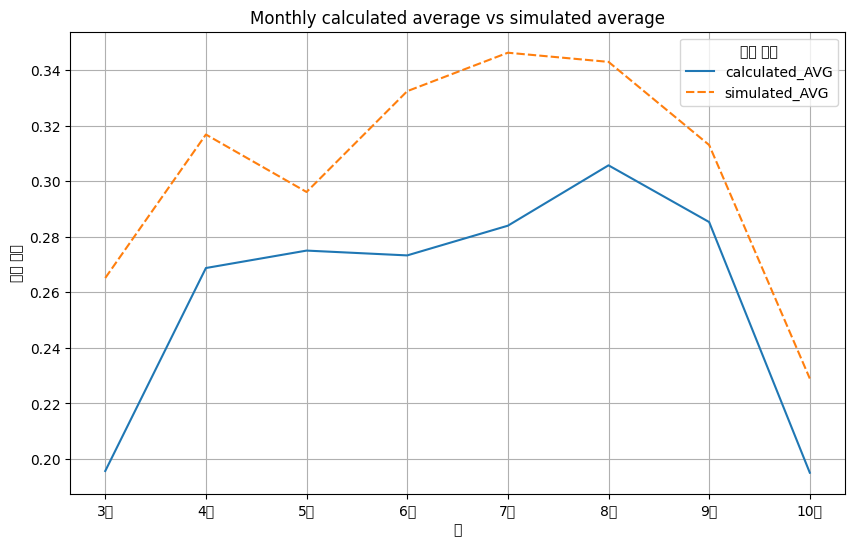

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# Set font to support Korean characters
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# Combine the two series into a single DataFrame for easier plotting
avg_comparison_df = pd.DataFrame({
    'calculated_AVG': monthly_calculated_avg,
    'simulated_AVG': monthly_simulated_avg
})

# Ensure the DataFrame is sorted by month
month_order = ['3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월']
avg_comparison_df = avg_comparison_df.reindex(month_order)


plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_comparison_df)
plt.xlabel('월')
plt.ylabel('평균 타율')
plt.title('Monthly calculated average vs simulated average')
plt.legend(title='타율 유형')
plt.grid(True)
plt.show()

In [108]:
import pandas as pd
import sqlite3

# 1. 파일 불러오기
df = pd.read_excel("/content/drive/MyDrive/구자욱 기록.xlsx")

# [중요] 컬럼 이름이 'AVG'인지 '타율'인지 확인하기 위해 미리 출력해봅니다.
print("현재 컬럼 목록:", df.columns)

# 2. DB 연결
conn = sqlite3.connect('baseball_stat.db')

# 3. DB 적재
df.to_sql('batter_stats', conn, if_exists='replace', index=False)

# 4. SQL 쿼리 (수정됨)
query = """
    SELECT 월,
           AVG("AVG") as 평균타율
    FROM batter_stats
    WHERE "AB" > 10    -- '타수'가 아니라 'AB'일 확률이 높습니다 (컬럼명 확인 필요)
    GROUP BY 월
    ORDER BY 평균타율 DESC
"""

# 5. 실행
result = pd.read_sql(query, conn)
print(result)

현재 컬럼 목록: Index(['Unnamed: 0', '월', 'PA', 'ePA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HP', 'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG',
       'OBP', 'SLG', 'OPS', 'NP', 'avLI', 'RE24', 'WPA'],
      dtype='object')
     월      평균타율
0   9월  0.333000
1   8월  0.331909
2   6월  0.331800
3   7월  0.322091
4   5월  0.308636
5  10월  0.296000
6   4월  0.294600
7   3월  0.243200
